# 과대적합과 과소적합

- 과대적합(overfitting)의 반대는 과소적합(underfitting)
- overfitting을 막는 방법: 더 많은 훈련 데이터 사용/ regularization

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals, unicode_literals

!pip install -q tf-nightly-2.0-preview
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

ERROR: Could not find a version that satisfies the requirement tf-nightly-2.0-preview (from versions: none)
ERROR: No matching distribution found for tf-nightly-2.0-preview


2.1.0


## IMDB dataset download

In [2]:
# 문장을 임베딩하지 않고 multi-hot-encoding
# 이 방법을 사용하면 모델이 오버피팅됨

NUM_WORDS = 10000

(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)

def multi_hot_sequences(sequences, dimension):
    # 0으로 채워진 (len(sequences), dimension) 크기의 행렬을 만듭니다
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0  # results[i]의 특정 인덱스만 1로 설정합니다
    return results


train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)

17465344/17464789 [==============================] - 5s 0us/step


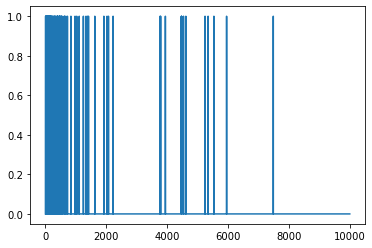

In [3]:
# 만들어진 멀티핫 벡터 확인
plt.plot(train_data[0])

## 기준 모델 만들기

In [4]:
baseline_model=keras.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS, )),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

baseline_model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy', 'binary_crossentropy'])

baseline_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160016    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


- 영화 리뷰를 긍정/부정으로 이진분류하는 문제
- 마지막 layer의 activation func은 sigmoid
- loss함수로 binary crossentropy 사용

In [5]:
baseline_history = baseline_model.fit(train_data,
                                      train_labels,
                                      epochs=20,
                                      batch_size=512,
                                      validation_data=(test_data, test_labels),
                                      verbose=2)


Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 6s - loss: 0.4960 - accuracy: 0.8108 - binary_crossentropy: 0.4960 - val_loss: 0.3464 - val_accuracy: 0.8737 - val_binary_crossentropy: 0.3464
Epoch 2/20
25000/25000 - 4s - loss: 0.2569 - accuracy: 0.9096 - binary_crossentropy: 0.2569 - val_loss: 0.2854 - val_accuracy: 0.8875 - val_binary_crossentropy: 0.2854
Epoch 3/20
25000/25000 - 4s - loss: 0.1886 - accuracy: 0.9348 - binary_crossentropy: 0.1886 - val_loss: 0.2881 - val_accuracy: 0.8856 - val_binary_crossentropy: 0.2881
Epoch 4/20
25000/25000 - 4s - loss: 0.1506 - accuracy: 0.9487 - binary_crossentropy: 0.1506 - val_loss: 0.3048 - val_accuracy: 0.8803 - val_binary_crossentropy: 0.3048
Epoch 5/20
25000/25000 - 3s - loss: 0.1247 - accuracy: 0.9598 - binary_crossentropy: 0.1247 - val_loss: 0.3290 - val_accuracy: 0.8766 - val_binary_crossentropy: 0.3290
Epoch 6/20
25000/25000 - 3s - loss: 0.1050 - accuracy: 0.9672 - binary_crossentropy: 0.1050 - val_loss: 0.3594

- 왜 val set에 test set을 넣은거지?

## 작은 모델 만들기

- 기준 모델과 layer수는 3개로 동일
- 기준 모델보다 units수는 적음

In [7]:
smaller_model=keras.Sequential([
    keras.layers.Dense(4, activation='relu', input_shape=(NUM_WORDS, )),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

smaller_model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy', 'binary_crossentropy'])

smaller_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4)                 40004     
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________


In [8]:
# 같은 데이터를 사용해 작은 모델 훈련시키기

smaller_history = smaller_model.fit(train_data,
                                    train_labels,
                                    epochs=20,
                                    batch_size=512,
                                    validation_data=(test_data, test_labels),
                                    verbose=2)


Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 3s - loss: 0.6214 - accuracy: 0.6024 - binary_crossentropy: 0.6214 - val_loss: 0.5581 - val_accuracy: 0.7200 - val_binary_crossentropy: 0.5581
Epoch 2/20
25000/25000 - 3s - loss: 0.5063 - accuracy: 0.8203 - binary_crossentropy: 0.5063 - val_loss: 0.4974 - val_accuracy: 0.8188 - val_binary_crossentropy: 0.4974
Epoch 3/20
25000/25000 - 2s - loss: 0.4499 - accuracy: 0.8774 - binary_crossentropy: 0.4499 - val_loss: 0.4663 - val_accuracy: 0.8531 - val_binary_crossentropy: 0.4663
Epoch 4/20
25000/25000 - 2s - loss: 0.4113 - accuracy: 0.9106 - binary_crossentropy: 0.4113 - val_loss: 0.4543 - val_accuracy: 0.8536 - val_binary_crossentropy: 0.4543
Epoch 5/20
25000/25000 - 2s - loss: 0.3816 - accuracy: 0.9298 - binary_crossentropy: 0.3816 - val_loss: 0.4434 - val_accuracy: 0.8623 - val_binary_crossentropy: 0.4434
Epoch 6/20
25000/25000 - 2s - loss: 0.3574 - accuracy: 0.9421 - binary_crossentropy: 0.3574 - val_loss: 0.4363

## 큰 모델 만들기

- 기준 모델과 layer수는 3개로 동일
- 기준 모델보다 units개수는 많음

In [9]:
bigger_model = keras.models.Sequential([
    keras.layers.Dense(512, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

bigger_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy','binary_crossentropy'])

bigger_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               5120512   
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 513       
Total params: 5,383,681
Trainable params: 5,383,681
Non-trainable params: 0
_________________________________________________________________


In [10]:
# 큰 모델 훈련시키기

bigger_history = bigger_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 8s - loss: 0.3462 - accuracy: 0.8490 - binary_crossentropy: 0.3462 - val_loss: 0.2937 - val_accuracy: 0.8810 - val_binary_crossentropy: 0.2937
Epoch 2/20
25000/25000 - 8s - loss: 0.1449 - accuracy: 0.9460 - binary_crossentropy: 0.1449 - val_loss: 0.3234 - val_accuracy: 0.8749 - val_binary_crossentropy: 0.3234
Epoch 3/20
25000/25000 - 9s - loss: 0.0479 - accuracy: 0.9858 - binary_crossentropy: 0.0479 - val_loss: 0.4294 - val_accuracy: 0.8681 - val_binary_crossentropy: 0.4294
Epoch 4/20
25000/25000 - 10s - loss: 0.0075 - accuracy: 0.9988 - binary_crossentropy: 0.0075 - val_loss: 0.5714 - val_accuracy: 0.8689 - val_binary_crossentropy: 0.5714
Epoch 5/20
25000/25000 - 10s - loss: 9.7901e-04 - accuracy: 1.0000 - binary_crossentropy: 9.7901e-04 - val_loss: 0.6899 - val_accuracy: 0.8684 - val_binary_crossentropy: 0.6899
Epoch 6/20
25000/25000 - 10s - loss: 2.6500e-04 - accuracy: 1.0000 - binary_crossentropy: 2.6500e-04

## 훈련 손실과 검증 손실 그래프 그리기

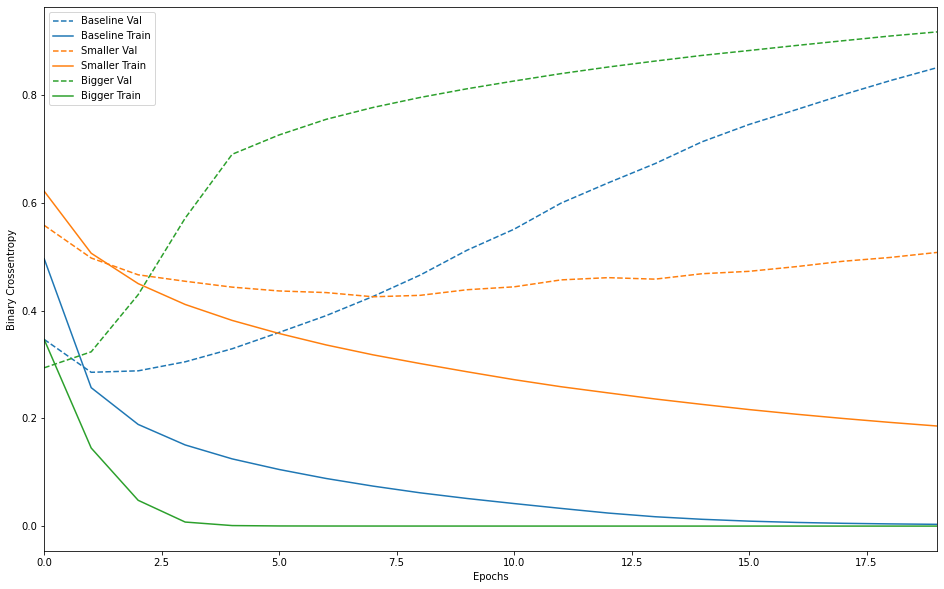

In [11]:
def plot_history(histories, key='binary_crossentropy'):
  plt.figure(figsize=(16,10))

  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

  plt.xlim([0,max(history.epoch)])


plot_history([('baseline', baseline_history),
              ('smaller', smaller_history),
              ('bigger', bigger_history)])

- 큰 네트워크는 거의 첫번째 에폭 이후에 오버피팅이 시작됨
- 큰 네트워크는 base 네트워크보다 심각하게 오버피팅됨

## 과대적합을 방지하기 위한 전략

### regularization: 가중치를 규제하기

In [12]:
# l2 regularization을 추가한 모델

l2_model = keras.models.Sequential([
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

l2_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy', 'binary_crossentropy'])

l2_model_history = l2_model.fit(train_data, train_labels,
                                epochs=20,
                                batch_size=512,
                                validation_data=(test_data, test_labels),
                                verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 3s - loss: 0.5340 - accuracy: 0.8029 - binary_crossentropy: 0.4963 - val_loss: 0.3901 - val_accuracy: 0.8772 - val_binary_crossentropy: 0.3502
Epoch 2/20
25000/25000 - 2s - loss: 0.3142 - accuracy: 0.9069 - binary_crossentropy: 0.2696 - val_loss: 0.3360 - val_accuracy: 0.8886 - val_binary_crossentropy: 0.2878
Epoch 3/20
25000/25000 - 2s - loss: 0.2610 - accuracy: 0.9260 - binary_crossentropy: 0.2102 - val_loss: 0.3357 - val_accuracy: 0.8860 - val_binary_crossentropy: 0.2831
Epoch 4/20
25000/25000 - 2s - loss: 0.2365 - accuracy: 0.9374 - binary_crossentropy: 0.1823 - val_loss: 0.3462 - val_accuracy: 0.8826 - val_binary_crossentropy: 0.2908
Epoch 5/20
25000/25000 - 2s - loss: 0.2206 - accuracy: 0.9441 - binary_crossentropy: 0.1640 - val_loss: 0.3564 - val_accuracy: 0.8792 - val_binary_crossentropy: 0.2990
Epoch 6/20
25000/25000 - 2s - loss: 0.2100 - accuracy: 0.9493 - binary_crossentropy: 0.1513 - val_loss: 0.3706

- l2(0.001)은 네트워크의 전체 손실 층에 가중치 행렬의 모든 값이 0.001*weight_coefficient_value^2만큼 더해진다는 의미

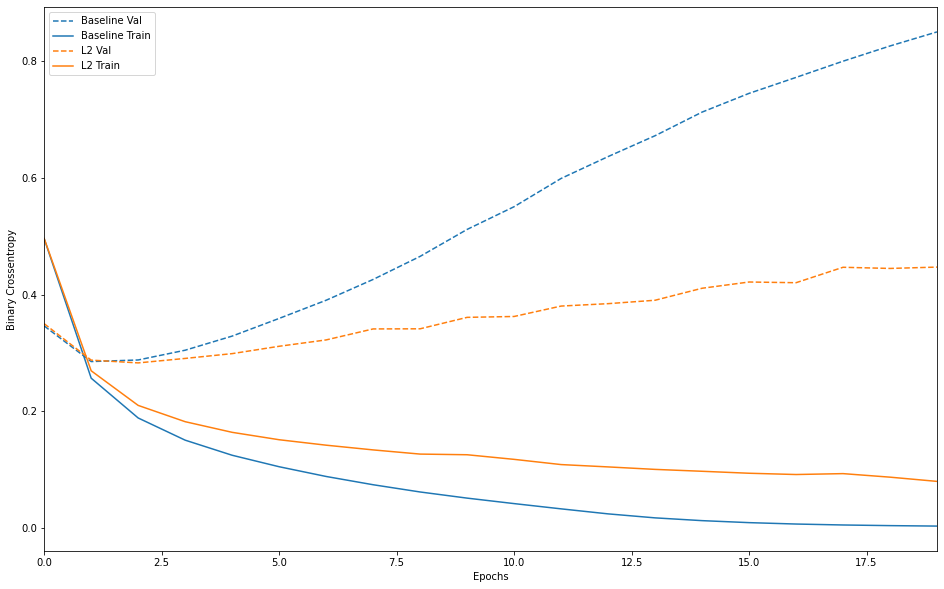

In [13]:
plot_history([('baseline', baseline_history),
              ('l2', l2_model_history)])

- test단계보다 train단계에서 네트워크 손실이 훨씬 더 큼
- test단계보다 train단계에서 엔트로피가 큼

### 드랍아웃 추가하기

In [14]:
dpt_model = keras.models.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

dpt_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy','binary_crossentropy'])

dpt_model_history = dpt_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 3s - loss: 0.6275 - accuracy: 0.6430 - binary_crossentropy: 0.6275 - val_loss: 0.4779 - val_accuracy: 0.8455 - val_binary_crossentropy: 0.4779
Epoch 2/20
25000/25000 - 2s - loss: 0.4438 - accuracy: 0.8097 - binary_crossentropy: 0.4438 - val_loss: 0.3331 - val_accuracy: 0.8802 - val_binary_crossentropy: 0.3331
Epoch 3/20
25000/25000 - 2s - loss: 0.3454 - accuracy: 0.8694 - binary_crossentropy: 0.3454 - val_loss: 0.2872 - val_accuracy: 0.8866 - val_binary_crossentropy: 0.2872
Epoch 4/20
25000/25000 - 2s - loss: 0.2889 - accuracy: 0.8928 - binary_crossentropy: 0.2889 - val_loss: 0.2838 - val_accuracy: 0.8823 - val_binary_crossentropy: 0.2838
Epoch 5/20
25000/25000 - 2s - loss: 0.2496 - accuracy: 0.9151 - binary_crossentropy: 0.2496 - val_loss: 0.2776 - val_accuracy: 0.8893 - val_binary_crossentropy: 0.2776
Epoch 6/20
25000/25000 - 2s - loss: 0.2158 - accuracy: 0.9292 - binary_crossentropy: 0.2158 - val_loss: 0.2896

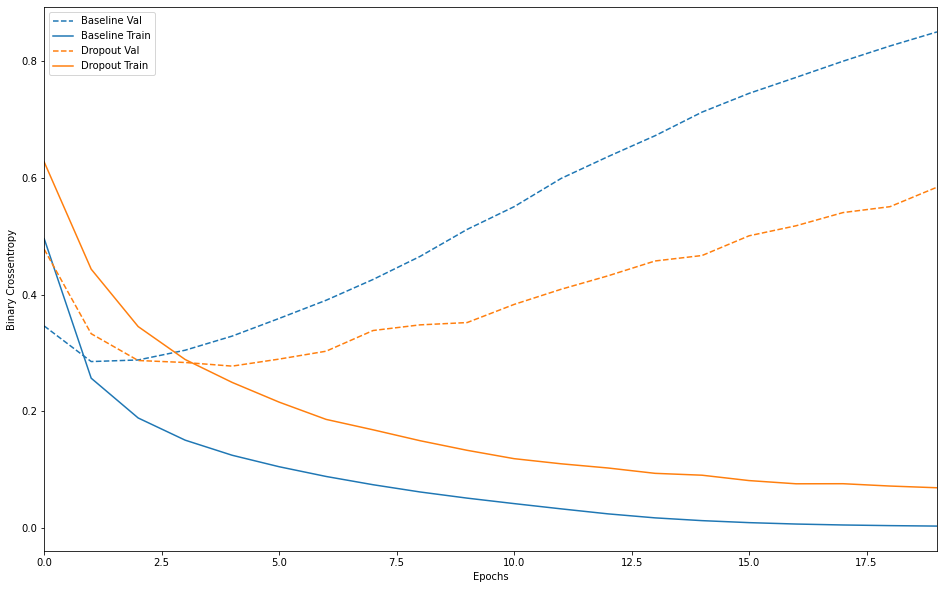

In [15]:
plot_history([('baseline', baseline_history),
              ('dropout', dpt_model_history)])